In [2]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
train_dir = "/kaggle/input/yawn-eye-dataset-new/dataset_new/train/"
test_dir = "/kaggle/input/yawn-eye-dataset-new/dataset_new/test/"

In [4]:
import os
import numpy as np

In [5]:
def load_images(directory):
    images = []
    labels = []
    
    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(256,256))
            images.append(image)
            labels.append(category)
    
    images = np.array(images,dtype='float32')
    return images, labels

In [6]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

In [7]:
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
cnn = Sequential()

cnn.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

# cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(MaxPooling2D(pool_size=2))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Dense(units=4,activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,924 (28.22 MB)

 Trainable params: 7,397,476 (28.22 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/model.weights.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

In [13]:
r = cnn.fit(x=X_train,
            y=y_train,
            epochs=50,
            batch_size=64,
            validation_data=(X_test,y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/50


I0000 00:00:1731434248.588244     103 service.cc:145] XLA service 0x7f2910012e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731434248.588334     103 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/39 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.3056 - loss: 2.6836 

I0000 00:00:1731434258.556380     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - acc: 0.5941 - loss: 1.3350 - val_acc: 0.2517 - val_loss: 3.6442 - learning_rate: 0.0010
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.8022 - loss: 0.4078 - val_acc: 0.2679 - val_loss: 4.6484 - learning_rate: 0.0010
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.8476 - loss: 0.3320 - val_acc: 0.2587 - val_loss: 5.2230 - learning_rate: 0.0010
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.8789 - loss: 0.2602 - val_acc: 0.2517 - val_loss: 6.5058 - learning_rate: 0.0010
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9104 - loss: 0.2173 - val_acc: 0.2564 - val_loss: 6.0577 - learning_rate: 0.0010
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9407 - loss: 0.1586 - val_acc: 0.2702 - val_loss: 6.0570 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9421 - loss: 0.1577 - val_acc: 0.2517 - val_loss: 7.5379 - learning_rate: 0.0010
Epoch 8/50
39/39 ━━━━━

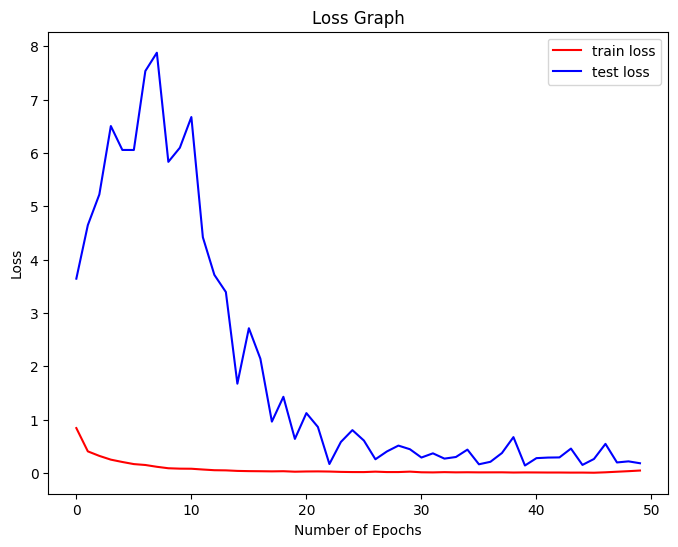

In [14]:
plt.figure(figsize=(8,6))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

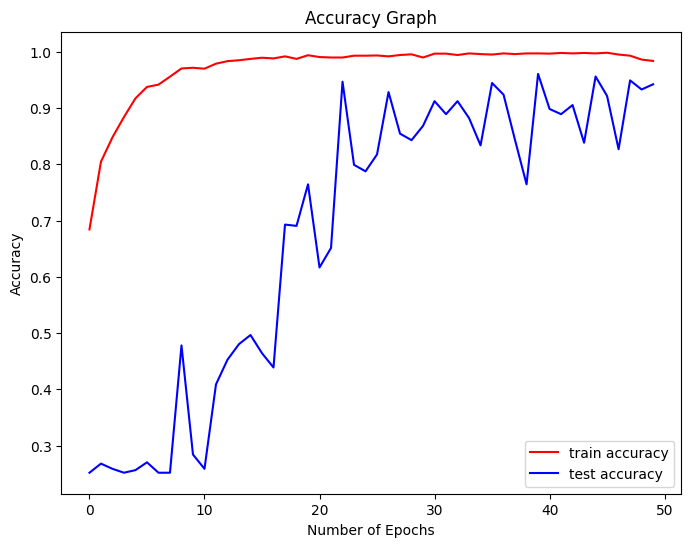

In [15]:
plt.figure(figsize=(8,6))
plt.plot(r.history['acc'],'r',label='train accuracy')
plt.plot(r.history['val_acc'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


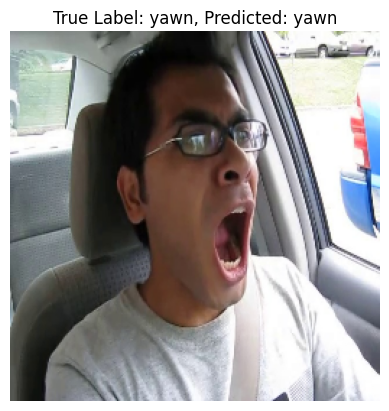

In [18]:
import random

def predict_random_image(X_test, y_test, model):
    
    random_index = random.randint(0, len(X_test) - 1)
    
    random_image = X_test[random_index]
    true_label = y_test[random_index]
    
    random_image_expanded = np.expand_dims(random_image, axis=0)
    
    prediction = model.predict(random_image_expanded)
    
    # Get the predicted class (index of the highest probability)
    predicted_class_index = np.argmax(prediction[0])
    
    # Decode the predicted class
    predicted_class = encoder.inverse_transform([predicted_class_index])
    
    # Display the image and prediction
    plt.imshow(random_image)
    plt.axis('off')
    plt.title(f'True Label: {encoder.inverse_transform([np.argmax(true_label)])[0]}, Predicted: {predicted_class[0]}')
    plt.show()

# Call the function to predict a random image
predict_random_image(X_test, y_test, cnn)